MongoDB是由C++语言编写的非关系型数据库，是一个基于分布式文件存储的开源数据库系统，其内容存储形式类似JSON对象，它的字段值可以包含其他文档、数组及文档数组，非常灵活。在这一节中，我们就来看看Python 3下MongoDB的存储操作。

# 1. 准备工作
在开始之前，请确保已经安装好了MongoDB并启动了其服务，并且安装好了Python的PyMongo库。如果没有安装，可以参考第1章。

# 2. 连接MongoDB
连接MongoDB时，我们需要使用PyMongo库里面的MongoClient。一般来说，传入MongoDB的IP及端口即可，其中第一个参数为地址host，第二个参数为端口port（如果不给它传递参数，默认是27017）：

In [1]:
import pymongo
client = pymongo.MongoClient(host='localhost',port=27017)

这样就可以创建MongoDB的连接对象了。

另外，MongoClient的第一个参数host还可以直接传入MongoDB的连接字符串，它以mongodb开头，例如：
```
client = MongoClient('mongodb://localhost:27017/')
```

# 3. 指定数据库
MongoDB中可以建立多个数据库，接下来我们需要指定操作哪个数据库。这里我们以test数据库为例来说明，下一步需要在程序中指定要使用的数据库：

In [2]:
db = client.test1

这里调用client的test属性即可返回test数据库。当然，我们也可以这样指定：
`db = client['test']`

# 4. 指定集合
MongoDB的每个数据库又包含许多集合（collection），它们类似于关系型数据库中的表。

下一步需要指定要操作的集合，这里指定一个集合名称为students。与指定数据库类似，指定集合也有两种方式：

In [3]:
collection = db.students

`collection = db['students']`

# 5. 插入数据
接下来，便可以插入数据了。对于students这个集合，新建一条学生数据，这条数据以字典形式表示：

In [4]:
student = {
    'id': '20170101',
    'name': 'Jordan',
    'age': 20,
    'gender': 'male'
}

In [5]:
result = collection.insert(student)
print(result)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """Entry point for launching an IPython kernel.


5bc04113ddc6071abc1766ea


In [6]:
print(type(result))

<class 'bson.objectid.ObjectId'>


在MongoDB中，每条数据其实都有一个_id属性来唯一标识。如果没有显式指明该属性，MongoDB会自动产生一个ObjectId类型的_id属性。insert()方法会在执行后返回_id值。

当然，我们也可以同时插入多条数据，只需要以列表形式传递即可，示例如下：

In [7]:
student1 = {
    'id': '20170101',
    'name': 'Jordan',
    'age': 20,
    'gender': 'male'
}
 
student2 = {
    'id': '20170202',
    'name': 'Mike',
    'age': 21,
    'gender': 'male'
}
result = collection.insert([student1,student2])
print(result)

[ObjectId('5bc0414fddc6071abc1766eb'), ObjectId('5bc0414fddc6071abc1766ec')]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


实际上，在PyMongo 3.x版本中，官方已经不推荐使用insert()方法了。当然，继续使用也没有什么问题。官方推荐使用insert_one()和insert_many()方法来分别插入单条记录和多条记录，示例如下：

In [8]:
student = {
    'id': '20170101',
    'name': 'Jordan',
    'age': 20,
    'gender': 'male'
}
result = collection.insert_one(student)
print(result)

In [9]:
print(result.inserted_id)

5bc04176ddc6071abc1766ed


与insert()方法不同，这次返回的是InsertOneResult对象，我们可以调用其inserted_id属性获取_id。

对于insert_many()方法，我们可以将数据以列表形式传递，示例如下：

In [10]:
student1 = {
    'id': '20170101',
    'name': 'Jordan',
    'age': 20,
    'gender': 'male'
}
 
student2 = {
    'id': '20170202',
    'name': 'Mike',
    'age': 21,
    'gender': 'male'
}
 
result = collection.insert_many([student1, student2])
print(result)
print(result.inserted_ids)

[ObjectId('5bc0419dddc6071abc1766ee'), ObjectId('5bc0419dddc6071abc1766ef')]


该方法返回的类型是InsertManyResult，调用inserted_ids属性可以获取插入数据的_id列表。

# 6. 查询
插入数据后，我们可以利用find_one()或find()方法进行查询，其中find_one()查询得到的是单个结果，find()则返回一个生成器对象。示例如下：

In [12]:
result = collection.find_one({'name':'Mike'})
print(type(result))
print(result)

<class 'dict'>
{'_id': ObjectId('5bc0414fddc6071abc1766ec'), 'id': '20170202', 'name': 'Mike', 'age': 21, 'gender': 'male'}


可以发现，它多了_id属性，这就是MongoDB在插入过程中自动添加的。

此外，我们也可以根据ObjectId来查询，此时需要使用bson库里面的objectid：

In [14]:
from bson.objectid import ObjectId
result = collection.find_one({'_id':ObjectId('5bc0414fddc6071abc1766ec')})
print(result)

{'_id': ObjectId('5bc0414fddc6071abc1766ec'), 'id': '20170202', 'name': 'Mike', 'age': 21, 'gender': 'male'}


当然，如果查询结果不存在，则会返回None。

对于多条数据的查询，我们可以使用find()方法。例如，这里查找年龄为20的数据，示例如下

In [16]:
results = collection.find({'age':20})
print(results)
for result in results:
    print(result)

{'_id': ObjectId('5bc04113ddc6071abc1766ea'), 'id': '20170101', 'name': 'Jordan', 'age': 20, 'gender': 'male'}
{'_id': ObjectId('5bc0414fddc6071abc1766eb'), 'id': '20170101', 'name': 'Jordan', 'age': 20, 'gender': 'male'}
{'_id': ObjectId('5bc04176ddc6071abc1766ed'), 'id': '20170101', 'name': 'Jordan', 'age': 20, 'gender': 'male'}
{'_id': ObjectId('5bc0419dddc6071abc1766ee'), 'id': '20170101', 'name': 'Jordan', 'age': 20, 'gender': 'male'}


返回结果是Cursor类型，它相当于一个生成器，我们需要遍历取到所有的结果，其中每个结果都是字典类型。

如果要查询年龄大于20的数据，则写法如下：

In [17]:
result = collection.find({'age':{'$gt':20}})

In [19]:
print(result)
for re in result:
    print(re)

{'_id': ObjectId('5bc0414fddc6071abc1766ec'), 'id': '20170202', 'name': 'Mike', 'age': 21, 'gender': 'male'}
{'_id': ObjectId('5bc0419dddc6071abc1766ef'), 'id': '20170202', 'name': 'Mike', 'age': 21, 'gender': 'male'}


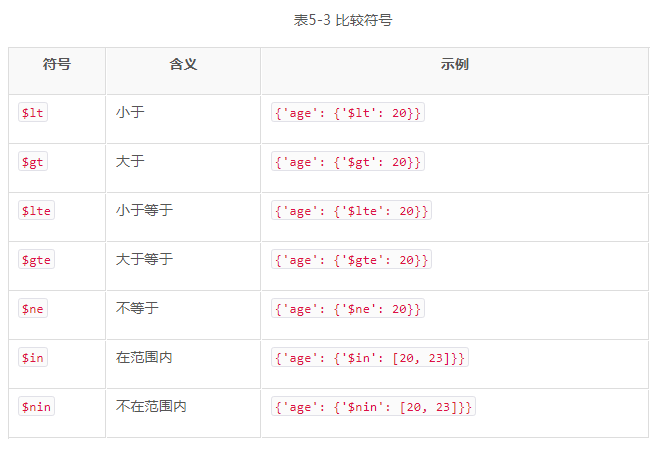

另外，还可以进行正则匹配查询。例如，查询名字以M开头的学生数据，示例如下：

In [20]:
result = collection.find({'name':{'$regex':'^M.*'}})

In [21]:
print(result)

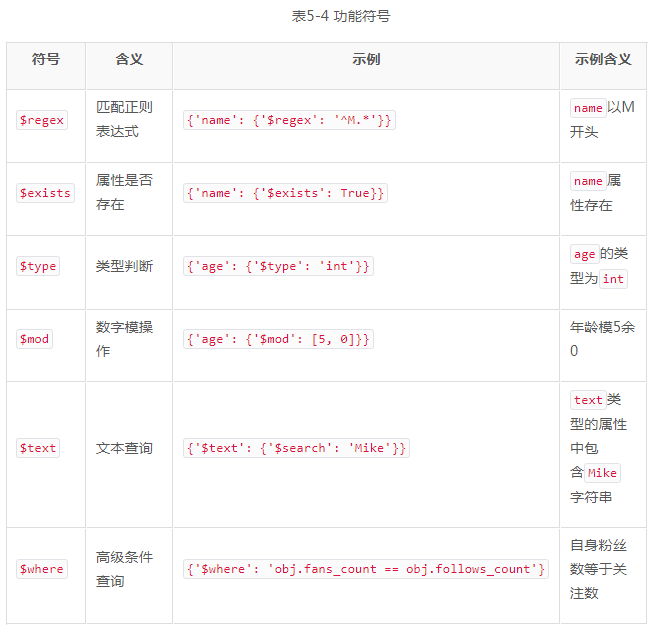

# 7. 计数
要统计查询结果有多少条数据，可以调用count()方法。比如，统计所有数据条数：

In [23]:
count = collection.find().count()

In [24]:
print(count)

6


In [25]:
count = collection.find({'age':20}).count()

In [26]:
print(count)

4


# 8. 排序
排序时，直接调用sort()方法，并在其中传入排序的字段及升降序标志即可。示例如下：

In [29]:
results = collection.find().sort('name',pymongo.ASCENDING)
print([result['name'] for result in results])

['Jordan', 'Jordan', 'Jordan', 'Jordan', 'Mike', 'Mike']


这里我们调用pymongo.ASCENDING指定升序。如果要降序排列，可以传入pymongo.DESCENDING

In [30]:
results = collection.find().sort('name',-1)
print([result['name'] for result in results])

['Mike', 'Mike', 'Jordan', 'Jordan', 'Jordan', 'Jordan']


# 9. 偏移
在某些情况下，我们可能想只取某几个元素，这时可以利用skip()方法偏移几个位置，比如偏移2，就忽略前两个元素，得到第三个及以后的元素

In [31]:
results =collection.find().sort('name',-1).skip(2)
print([result['name'] for result in results])

['Jordan', 'Jordan', 'Jordan', 'Jordan']


另外，还可以用limit()方法指定要取的结果个数，示例如下：

In [32]:
results =collection.find().sort('name',-1).skip(2).limit(1)
print([result['name'] for result in results])

['Jordan']


值得注意的是，在数据库数量非常庞大的时候，如千万、亿级别，最好不要使用大的偏移量来查询数据，因为这样很可能导致内存溢出。此时可以使用类似如下操作来查询：

In [34]:
from bson.objectid import ObjectId
collection.find({'_id': {'$gt': ObjectId('593278c815c2602678bb2b8d')}})

# 10. 更新
对于数据更新，我们可以使用update()方法，指定更新的条件和更新后的数据即可。例如：

In [36]:
condition = {'name':'Jordan'}
student = collection.find_one(condition)
print(student)

{'_id': ObjectId('5bc04113ddc6071abc1766ea'), 'id': '20170101', 'name': 'Jordan', 'age': 20, 'gender': 'male'}


In [38]:
student['age'] = 25
result = collection.update(condition,student)
print(result)

{'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  


返回结果是字典形式，ok代表执行成功，nModified代表影响的数据条数。

另外，我们也可以使用$set操作符对数据进行更新，代码如下

In [39]:
result = collection.update(condition, {'$set': {'name':'wangzhi'}})

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  """Entry point for launching an IPython kernel.


In [40]:
print(result)

{'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}


这样可以只更新student字典内存在的字段。如果原先还有其他字段，则不会更新，也不会删除。而如果不用$set的话，则会把之前的数据全部用student字典替换；如果原本存在其他字段，则会被删除。

另外，update()方法其实也是官方不推荐使用的方法。这里也分为update_one()方法和update_many()方法，用法更加严格，它们的第二个参数需要使用$类型操作符作为字典的键名，

In [42]:
condition = {'name': 'wangzhi'}
student = collection.find_one(condition)
student ={'age':26}
result = collection.update_one(condition, {'$set': student})
print(result)
print(result.matched_count, result.modified_count)

1 1


这里调用了update_one()方法，第二个参数不能再直接传入修改后的字典，而是需要使用{'$set': student}这样的形式，其返回结果是UpdateResult类型。然后分别调用matched_count和modified_count属性，可以获得匹配的数据条数和影响的数据条数。

In [43]:
condition = {'age': {'$gt': 20}}
result = collection.update_one(condition, {'$inc': {'age': 1}})
print(result)
print(result.matched_count, result.modified_count)

1 1


这里指定查询条件为年龄大于20，然后更新条件为{'$inc': {'age': 1}}，也就是年龄加1，执行之后会将第一条符合条件的数据年龄加1。

可以看到匹配条数为1条，影响条数也为1条。

如果调用update_many()方法，则会将所有符合条件的数据都更新，示例如下：

In [44]:
condition = {'age': {'$gt': 20}}
result = collection.update_many(condition, {'$inc': {'age': 1}})
print(result)
print(result.matched_count, result.modified_count)

3 3


# 11. 删除
删除操作比较简单，直接调用remove()方法指定删除的条件即可，此时符合条件的所有数据均会被删除。示例如下： 

In [45]:
result = collection.remove({'name':'wangzhi'})
print(result)

{'n': 1, 'ok': 1.0}


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  """Entry point for launching an IPython kernel.


另外，这里依然存在两个新的推荐方法——delete_one()和delete_many()。示例如下：

In [46]:
result = collection.delete_one({'name': 'Kevin'})
print(result)
print(result.deleted_count)
result = collection.delete_many({'age': {'$lt': 25}})
print(result.deleted_count)

0
5


delete_one()即删除第一条符合条件的数据，delete_many()即删除所有符合条件的数据。它们的返回结果都是DeleteResult类型，可以调用deleted_count属性获取删除的数据条数。

# 12. 其他操作
另外，PyMongo还提供了一些组合方法，如find_one_and_delete()、find_one_and_replace()和find_one_and_update()，它们是查找后删除、替换和更新操作，其用法与上述方法基本一致。

另外，还可以对索引进行操作，相关方法有create_index()、create_indexes()和drop_index()等。